# Fiber models - comparison of responses to remote sonication by planar circular transducer

- SD curve myelinated for different frequencies at default distance and diameter
- SD curve unmyelinated for different frequencies at default distance and diameter
- SD curve myelinated for different diameters at default distance and frequency
- SD curve unmyelinated for different diameters at default distance and frequency
- SD curve myelinated for different distances at default diameter and frequency
- SD curve unmyelinated for different distances at default diameter and frequency
- conclusion about influence of myelination, fiber diameter, US frequency and source distance on excitability
- Identify potential features that could be interesting for experimental validation.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from PySONIC.utils import logger, si_format
from PySONIC.neurons import getPointNeuron
from ExSONIC.core import PlanarDiskTransducerSource, SonicSennFiber
from ExSONIC.plt import SectionCompTimeSeries, strengthDurationCurve, strengthDistanceCurve

## Acoustic propagation from a planar transducer

-> ref 2D field for different frequencies 

# Strength-duration curves

chronaxie = 47.97us


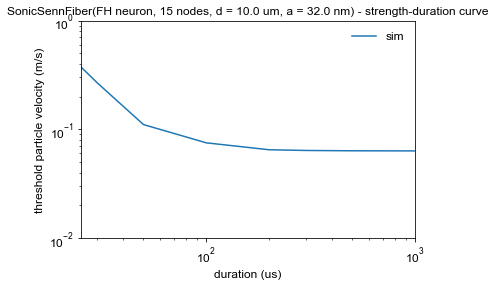

In [11]:
# Strength-duration curve
fiber.reset()
psource.x = (psource.x[0], z0)
durations = np.array([0.025, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1], dtype=float) * 1e-3  # s
uthrs = np.array([fiber.titrate(psource, x, toffset, PRF, DC) for x in durations])
fig = strengthDurationCurve(
    fiber, durations, {'sim': np.array(uthrs)}, scale='log', plot_chr=False,
    yname='particle velocity', yfactor=1e0, yunit='m/s')

#Calculating chronaxie
rheobase = np.min(uthrs) # m/s
rheobase2 = 2*rheobase
print(f'chronaxie = {np.interp(rheobase2, uthrs[::-1], durations[::-1])* 1e6:.2f}us')